In [6]:
!pip list | grep torch

torch                              1.9.1
torchvision                        0.10.1


In [ ]:
# from feat import Fex
# fex = Fex()

# from feat import Detector
# detector = Detector()

from feat import Detector
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

# image prediction
# for i in ["happyness", "sadness", "surprise"]:
# for i in ["anger", "disgust", "fear"]:
#     image_prediction = detector.detect_image(i + ".png")
#     image_prediction.plot_detections()

# video prediction
import os
filePath = "../Study3/"
videoNames = os.listdir(filePath)
flag = 0
for i in videoNames:
    if flag < 1:
        tempVideoPath = os.path.join(filePath, i)
        print(tempVideoPath)
        # video_prediction = detector.detect_video(tempVideoPath, skip_frames=0)
        video_prediction = detector.detect_video(tempVideoPath)
        video_prediction.emotions().plot()
        print(video_prediction.head())

        flag += 1

In [1]:
from feat import Detector
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)


/home/dongagent/anaconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/feat/resources/mobilenet_224_model_best_gdconv_external.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/feat/resources/RF_568.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/lib/python3.8/site-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: 

/home/dongagent/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:106: UserWarning: 
GeForce RTX 3070 Laptop GPU with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the GeForce RTX 3070 Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


Loading au model:  rf


/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/dongagent/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 0.23.2. Thi

Loading emotion model:  resmasknet


EOFError: Ran out of input

In [2]:
# image prediction

for i in ["anger", "disgust", "fear", "happyness", "sadness", "surprise"]:
#     image_prediction = detector.detect_image(i + ".png")
#     image_prediction.head()
    image_prediction = detector.detect_image("Study2/" + i + ".png")
    df = image_prediction.head()
    print(df.iloc[:, -8:])

      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.000435  0.003168  0.033113   0.002582  0.010705  0.001505  0.948491   

              input  
0  Study2/anger.png  
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.001611  0.352698  0.004234   0.070605  0.012357  0.006898  0.551596   

                input  
0  Study2/disgust.png  
      anger  disgust      fear  happiness   sadness  surprise   neutral  \
0  0.000612  0.00281  0.885761   0.000713  0.021024  0.050703  0.038378   

             input  
0  Study2/fear.png  
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.000506  0.019046  0.002265   0.167039  0.021605  0.000725  0.788813   

                  input  
0  Study2/happyness.png  
      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.000961  0.001695  0.045529   0.000267  0.734267  0.009358  0.207923   

                input  
0  Study2/sadness.png  
   

# Confusion Matrix

(30, 12)
      y_Actual y_Predicted
0        Anger       Anger
1      Disgust     Disgust
2         Fear        Fear
3    Happiness   Happiness
4      Sadness     Sadness
..         ...         ...
355      Anger     Disgust
356   Surprise        Fear
357  Happiness   Happiness
358    Sadness     Sadness
359   Surprise    Surprise

[360 rows x 2 columns]


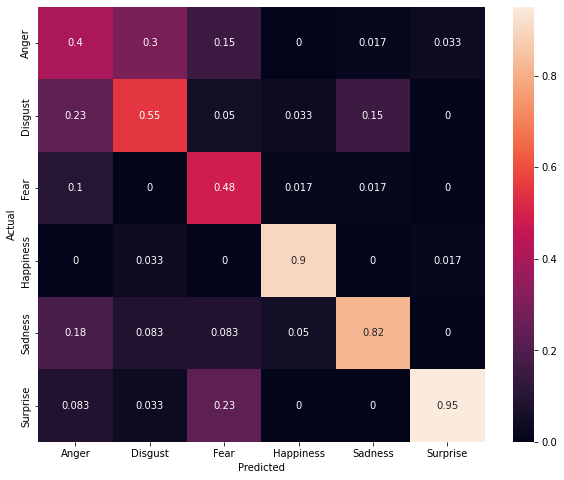

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("db_confussion_raw_study2.csv")

y_pred = df.iloc[:, 3:]
print(y_pred.shape)
y_actual=np.array([0,1,2,3,4,5,0,1,2,3,4,5])
temp = np.array([0,1,2,3,4,5,0,1,2,3,4,5])
for i in range(29):
    temp = np.vstack([temp, y_actual])

y_actual = temp

# confusion maatrix function receive one dimension vector
y_pred = np.array(df.iloc[:, 3:]).flatten()
y_actual = np.array(y_actual).flatten()

# background
# ---------------
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(10,8)) # set figure size
fig.set_facecolor('white') # set background color
# ---------------

def switch_to_Emotion(x):
    if x == 0:
        return "Anger"
    elif x == 1:
        return "Disgust"
    elif x == 2:
        return "Fear"
    elif x == 3:
        return "Happiness"
    elif x == 4:
        return "Sadness"
    elif x == 5:
        return "Surprise"
    else:
        raise Error
y_emo_pred = []
y_emo_actual = []

for i in range(y_pred.shape[0]):
    y_emo_pred.append(switch_to_Emotion(y_pred[i]))
    y_emo_actual.append(switch_to_Emotion(y_actual[i]))

# print(y_actual)
# print(y_pred)

data = {'y_Actual':    y_emo_pred,
        'y_Predicted': y_emo_actual
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print(df)
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted']) / 60 # proportion
# confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=True)
# plt.show()
fig.savefig("confusionmatrix_proportion.png", format="png", dpi=300)
fig.savefig("confusionmatrix_proportion.eps", format="eps")


# confusion matrix with sklearn
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_actual, y_pred)



# Correlation Matrix

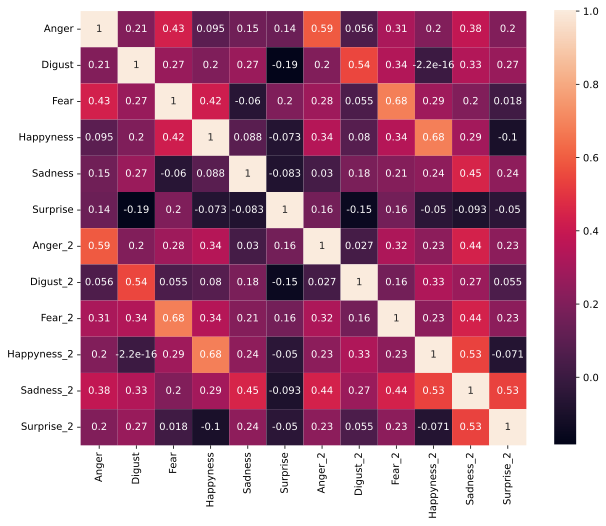

In [27]:
# Corr matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
df = pd.read_csv("db_raw_study2.csv")
df = df.iloc[:, 3:]

corrMatrix = df.corr()

# background
# ---------------
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(10,8)) # set figure size
fig.set_facecolor('white') # set background color
# ---------------

sn.heatmap(corrMatrix, annot = True) # generate heatmap

plt.show()
fig.savefig("correlationmatrix.png", format="png", dpi=300)
fig.savefig("correlationmatrix.eps", format="eps")


# consistance

In [ ]:
# Corr matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
df = pd.read_csv("db_raw_study2.csv")
df = df.iloc[:, 3:]

corrMatrix = df.corr()

from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(10,8)) # set figure size
fig.set_facecolor('white') # set background color
sn.heatmap(corrMatrix, annot = True) # generate heatmap

plt.show()